# PCA (Principal Component Analysis)

In [1]:
import numpy as np               
import matplotlib.pyplot as plt  
import pandas as pd

主成分分析を行うには scikit-learn パッケージを使用して，sklearn.decomposition の PCA でインスタンスを生成します．

以下の例では，Davis データを用いて主成分分析を行っています．

Davisデータ（Davis.csv）はJupyter Notebookの保存されているディレクトリと同じディレクトリに保存されているものとします．

Davisデータの読み込みには pandas パッケージの pd.read_csv を使用します．

データ配列の第1, 2列の各行がデータ点${\bf{x_{i}}} = ( w_{i}, h_{i} )$に対応しています（$x_{i}$は$i$番目の人の体重[kg]，$h_{i}$は身長[cm]に対応）．

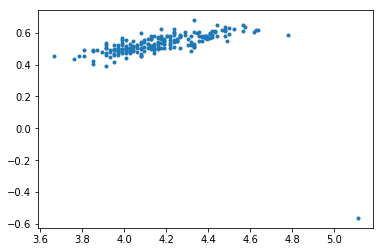

In [2]:
from sklearn.decomposition import PCA         # Use sklearn's PCA．
dat = pd.read_csv('data/Davis.csv').values    # Read data (use pandas)
# Convert the unit of height to [m] and calculate the value of logarithm.
logdat = np.log(np.c_[dat[:,1],dat[:,2]/100].astype('float'))
# Plot data
plt.plot(logdat[:,0], logdat[:,1], '.'); plt.show()

In [3]:
# PCA of data
pca = PCA()    
pca.fit(logdat) 
pca.components_       # Principal component

array([[ 0.99672116,  0.08091309],
       [ 0.08091309, -0.99672116]])

In [4]:
# Data at index 11 are removed as outliers.
clean_logdat = np.delete(logdat, 11, axis=0)

# Principal component analysis of data from which outliers have been removed
pca = PCA()    
pca.fit(clean_logdat) 
pca.components_       # Principal component

array([[ 0.97754866,  0.21070979],
       [-0.21070979,  0.97754866]])

# 因子分析

In [5]:
import numpy as np
from sklearn.datasets import load_boston  # BostonHousing を使う
BostonHousing = load_boston()             # データ読み込み

In [6]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale
X = scale(BostonHousing.data)  # データのスケーリング(相関行列に因子分解を適用)

In [7]:
X.shape                        # データ行列のサイズ：13次元506サンプル

(506, 13)

In [8]:
fa = FactorAnalysis(n_components=3)   # 因子数3で推定
rX = fa.fit_transform(X)              # 因子スコア

In [9]:
rX.shape

(506, 3)

In [10]:
fa.components_                        # 因子負荷行列

array([[ 0.6121372 , -0.4957598 ,  0.81341902,  0.00512797,  0.80406482,
        -0.3737183 ,  0.67562989, -0.71558151,  0.88828641,  0.93353022,
         0.47185072, -0.4688966 ,  0.66715612],
       [-0.14078614, -0.50308575,  0.26434287,  0.12250032,  0.3361002 ,
        -0.24617668,  0.47316763, -0.50591099, -0.31994494, -0.2548487 ,
        -0.09045084,  0.06657234,  0.27624587],
       [-0.04355955, -0.0156834 , -0.02700214,  0.18605562,  0.1230639 ,
         0.74390582,  0.12903434, -0.25659733,  0.05578977, -0.00510409,
        -0.27274263, -0.00219808, -0.39340095]])

In [11]:
fa.components_.shape                  # サイズは(因子数, 次元)

(3, 13)

In [12]:
# 因子負荷行列の要素：絶対値の大きさでソート．
BostonHousing.feature_names[np.argsort(np.abs(fa.components_[0,]))]

array(['CHAS', 'RM', 'B', 'PTRATIO', 'ZN', 'CRIM', 'LSTAT', 'AGE', 'DIS',
       'NOX', 'INDUS', 'RAD', 'TAX'], dtype='<U7')

# 多次元尺度構成法
（因子分解から続く）

In [13]:
import statsmodels.api as sm
from statsmodels.multivariate.factor_rotation import rotate_factors
L, T = sm.multivariate.factor_rotation.rotate_factors(fa.components_.T,'varimax')  # バリマックス回転基準
L

array([[ 0.57043995,  0.21934573, -0.15137979],
       [-0.09178679, -0.66322651,  0.22544355],
       [ 0.48692369,  0.64452273, -0.28240492],
       [-0.06175166,  0.15858936,  0.14382443],
       [ 0.44269911,  0.74439351, -0.15660172],
       [-0.11661929, -0.1440654 ,  0.84812104],
       [ 0.25798213,  0.77891875, -0.15409093],
       [-0.27557962, -0.86904556,  0.05158209],
       [ 0.90274757,  0.27065679, -0.0795093 ],
       [ 0.89683556,  0.32472334, -0.16338088],
       [ 0.41839969,  0.10212588, -0.346013  ],
       [-0.41359763, -0.21133849,  0.09259467],
       [ 0.34734964,  0.448523  , -0.59527198]])

In [14]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances 
n = 10                              # データ数
k = 2                               # データの次元
V = np.random.rand(n,k)             # 真の配置
d = euclidean_distances(V)          # 距離行列

In [15]:
# 計量的MDS(次元2): 10個の初期値で計算し最適な解を採用
md = MDS(n_components=2, metric=True, dissimilarity='precomputed', n_init=10, max_iter=3000)
md.fit(d)
rV2 = md.embedding_                 # 再構成された2次元点配置

In [16]:
# 計量的MDS(次元1) 
md.set_params(n_components=1)          
md.fit(d)        
rV1 = md.embedding_                 # 再構成された1次元点配置

In [17]:
rV1

array([[-0.44666602],
       [-0.57822003],
       [ 0.44809446],
       [-0.04723173],
       [ 0.23805488],
       [ 0.06677037],
       [ 0.34287245],
       [-0.61080818],
       [-0.17711593],
       [ 0.76424971]])

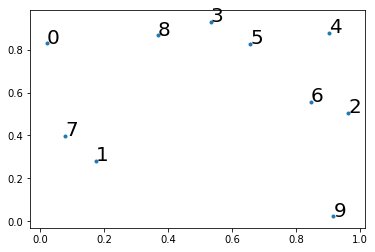

In [18]:
# 元データのプロット
plt.scatter(V[:,0],V[:,1],marker='.'); 
for i,(x,y) in enumerate(zip(V[:,0],V[:,1])): # 点番号も表示
    plt.annotate(str(i),(x,y),fontsize=20)
plt.show()

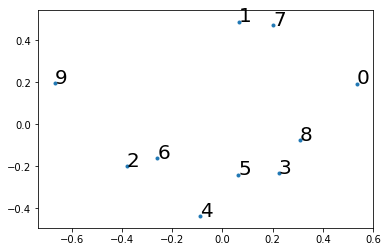

In [19]:
# 計量的MDSで再構成した点のプロット
plt.scatter(rV2[:,0],rV2[:,1],marker='.');    # 点番号も表示
for i,(x,y) in enumerate(zip(rV2[:,0],rV2[:,1])):
    plt.annotate(str(i),(x,y),fontsize=20)
plt.show()

In [20]:
from sklearn.manifold import MDS
data = pd.read_csv('data/voting.csv').values
#  S:非類似度行列(投票行動)，pidx: 所属する党(0/1)
S=data[:,:15]; pidx=data[:,15]  
col=['red','blue']; mk = ['x','o'] # 所属する党を区別するマーク

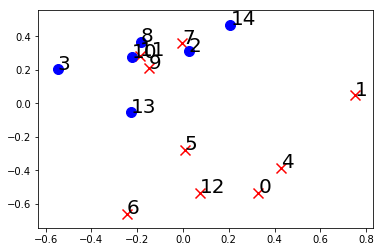

In [21]:
# 非計量的MDS
nmd = MDS(n_components=2, metric=False, dissimilarity='precomputed',  n_init=20,max_iter=3000)
nmd.fit(S)          # フィッティング
px = nmd.embedding_[:,0]; py = nmd.embedding_[:,1]
for i in [0,1]:     # プロット
    plt.scatter(px[pidx==i],py[pidx==i],c=col[i],marker=mk[i],s=100)
for i,(x,y) in enumerate(zip(px,py)):
    plt.annotate(str(i),(x,y),fontsize=20)    
plt.show()

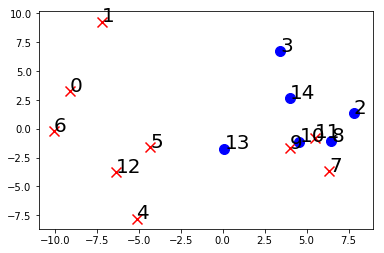

In [22]:
# 計量的MDS
nmd.set_params(metric=True)
nmd.fit(S)          # フィッティング
px = nmd.embedding_[:,0]; py = nmd.embedding_[:,1]
for i in [0,1]:     # プロット
    plt.scatter(px[pidx==i],py[pidx==i],c=col[i],marker=mk[i],s=100)
for i,(x,y) in enumerate(zip(px,py)):
    plt.annotate(str(i),(x,y),fontsize=20)    
plt.show()